# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [214]:
%pip install seaborn

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

## Notebook Presentation

In [80]:
pd.options.display.float_format = '{:,.2f}'.format

## Loading the Data

In [81]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [82]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [83]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [84]:
print("Not a Number values in each dataframe: ")
print("House Hold Income\n", df_hh_income.isna().sum())
print("Poverty Rate\n", df_pct_poverty.isna().sum())
print("Percent completed (hs)\n", df_pct_completed_hs.isna().sum())
print("Share race city\n", df_share_race_city.isna().sum())
print("Fatalities\n", df_fatalities.isna().sum())

Not a Number values in each dataframe: 
House Hold Income
 Geographic Area     0
City                0
Median Income      51
dtype: int64
Poverty Rate
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Percent completed (hs)
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Share race city
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Fatalities
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera            

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [85]:
df_hh_income.head(5)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [86]:
df_hh_income.fillna(0, inplace=True)

### As df_pct_poverty, df_pct_completed_hs and df_share_race_city have no NaN values, we will not replace anything in them

In [87]:
df_fatalities.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [88]:
df_fatalities[['age', 'armed', 'race', 'flee']] = df_fatalities[['age', 'armed', 'race', 'flee']].fillna("Not Specified")

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [106]:
df_states = np.array(df_pct_poverty['Geographic Area'].unique())
df_states

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [162]:
import math
poverty_dict = {}
for i in df_states:
    avarage = math.floor(df_pct_poverty[df_pct_poverty['Geographic Area'] == i]['poverty_rate'].mean() * 100) / 100
    poverty_dict[i] = avarage
avg_poverty_df = pd.DataFrame.from_dict(poverty_dict, orient="index", columns=["Poverty Rate"])
avg_poverty_df.reset_index(inplace=True)
avg_poverty_df.rename(columns={"index": "State"}, inplace=True)

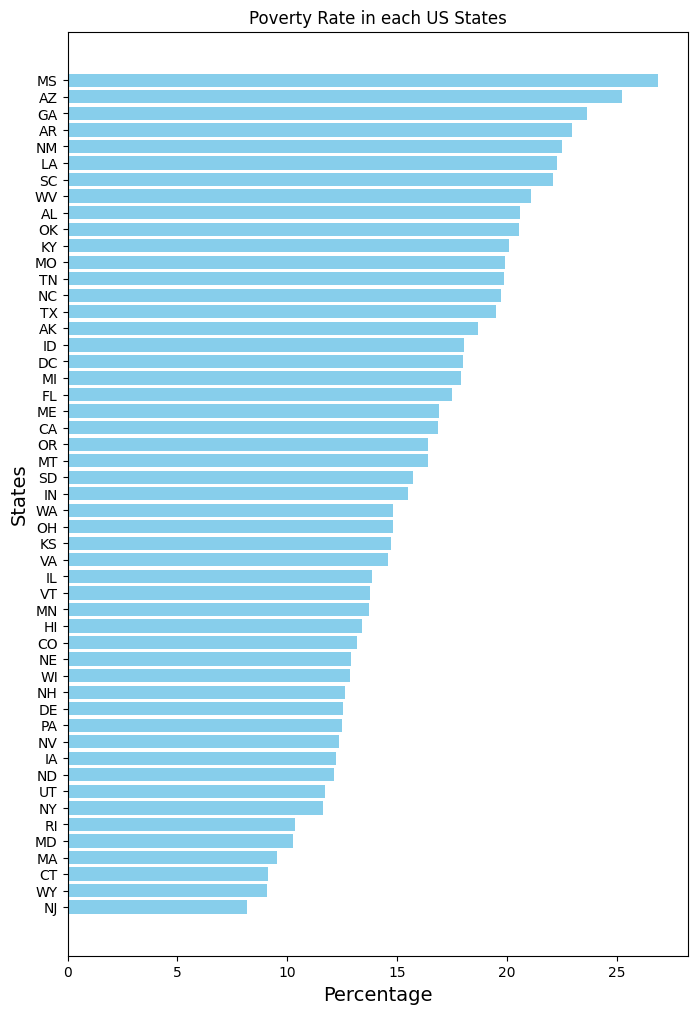

In [163]:
states = np.array(avg_poverty_df['State'])
poverty_rate = np.array(avg_poverty_df['Poverty Rate'])

# Sorting 
sorted_indeces = np.argsort(poverty_rate)[::-1]

# Sorted states & poverty rates
sorted_states = [states[i] for i in sorted_indeces][::-1]
sorted_poverty_rates = [poverty_rate[i] for i in sorted_indeces ][::-1]

plt.figure(figsize=(8,12))
plt.barh(sorted_states, sorted_poverty_rates, color='skyblue')
plt.ylabel("States", fontsize=14)
plt.xlabel("Percentage", fontsize=14)
plt.title("Poverty Rate in each US States")

plt.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [172]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

In [177]:
df_states = np.array(df_pct_completed_hs['Geographic Area'].unique())
print(df_pct_completed_hs.columns)
hsg_dict = {}
for i in df_states:
    avarage = math.floor(df_pct_completed_hs[df_pct_completed_hs['Geographic Area'] == i]['percent_completed_hs'].mean() * 100) / 100
    hsg_dict[i] = avarage
avg_hsg_df = pd.DataFrame.from_dict(hsg_dict, orient="index", columns=["avg_percent_completed_hs"])
avg_hsg_df.reset_index(inplace=True)
avg_hsg_df.rename(columns={"index": "State"}, inplace=True)
avg_hsg_df.head(5)

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')


,State,avg_percent_completed_hs
0,AL,80.30
1,AK,84.62
2,AZ,80.46
3,AR,79.94
4,CA,81.95


In [186]:
states = np.array(avg_hsg_df['State'])
high_school_g = np.array(avg_hsg_df['avg_percent_completed_hs'])

sorted_indeces =None
sorted_indeces = np.argsort(high_school_g)[::-1]
sorted_states = [states[i] for i in sorted_indeces][::-1]
sorted_hsg = [high_school_g[i] for i in sorted_indeces][::-1]

Text(0.5, 1.0, 'High School Graduation Rate by US State')

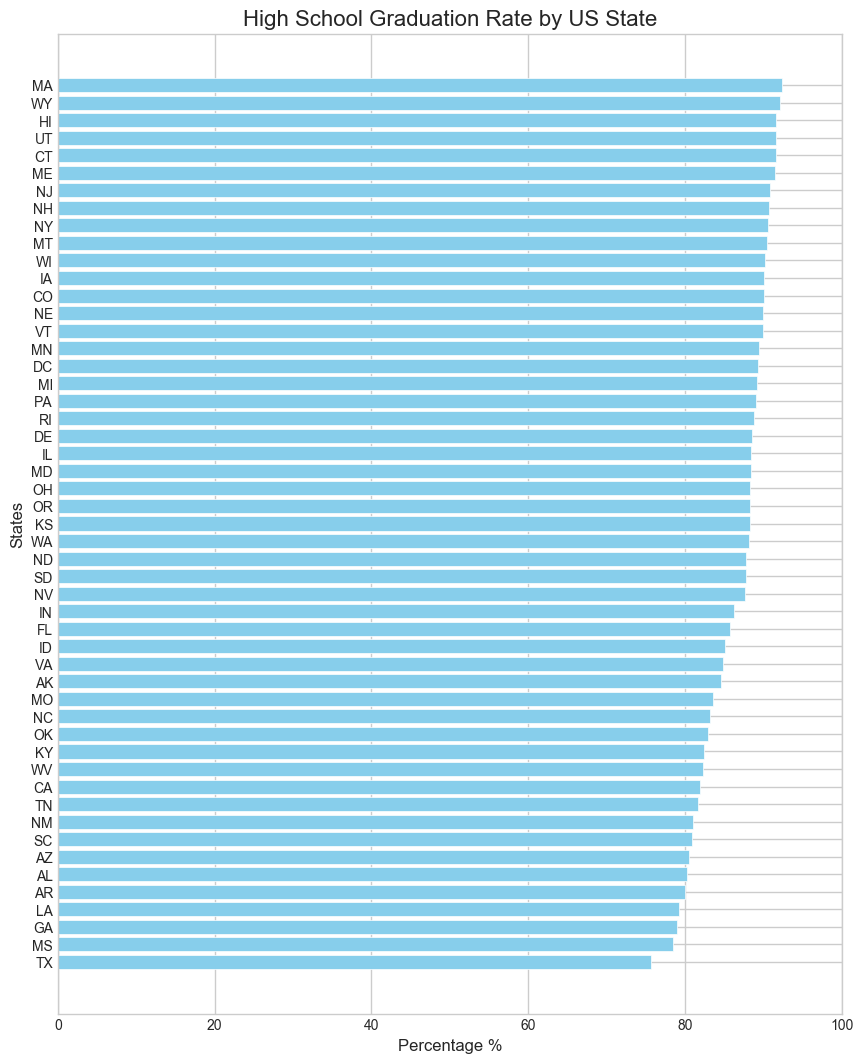

In [218]:
plt.figure(figsize=(8, 10))
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
plt.xlim(0, 100)
plt.barh(sorted_states, sorted_hsg, color='skyblue')
plt.ylabel("States", fontsize=12)
plt.xlabel("Percentage %", fontsize=12)
plt.title("High School Graduation Rate by US State")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).